# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the dataset

In [2]:
data=pd.read_csv('IMDb Movies India.csv',encoding='latin-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# Information about the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# Checking if there are null values in the dataset

In [4]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# Dropping the null values

In [5]:
data1=data.dropna()
data1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


# Eliminating all special charaters from Name column

In [6]:
pattern = r'[^a-zA-Z0-9\s]'
data1['Name'] = data1['Name'].apply(lambda x: re.sub(pattern, '', x))

In [7]:
data1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi He thought he was Gandhi,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


# Changing the datatypes of Year ,Votes and Duration 

In [8]:
data1['Year']=data1['Year'].str.strip('()').astype(int)

In [9]:
data1['Votes'] = data1['Votes'].str.replace(',','').astype('int')

In [10]:
data1['Duration'] = data1['Duration'].str.strip('min').astype('int')

In [11]:
data1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi He thought he was Gandhi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 420.0+ KB


# Checking duplicate records

In [13]:
data1.duplicated().sum()

0

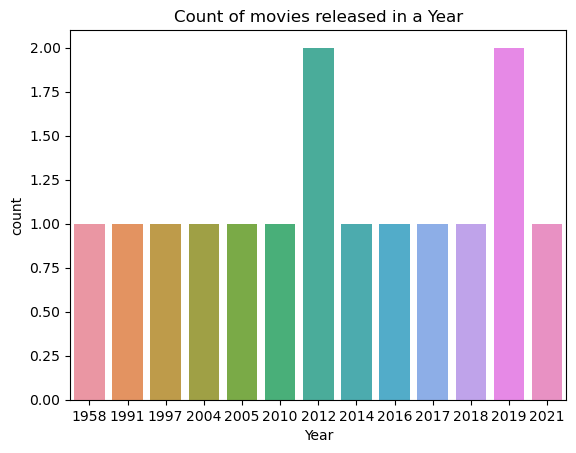

In [14]:
sns.countplot(x=data1['Year'].head(15))
plt.title('Count of movies released in a Year')
plt.show()

# 2012 and 2019 have 2 movies released

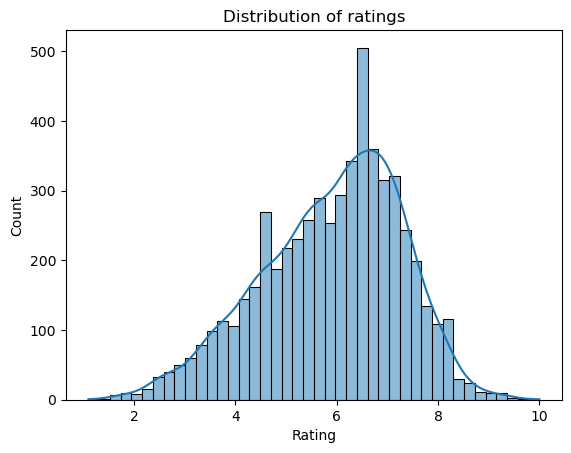

In [15]:
sns.histplot(data=data1,x='Rating',kde=True)
plt.title('Distribution of ratings')
plt.show()

# We can see normal distribution of Ratings

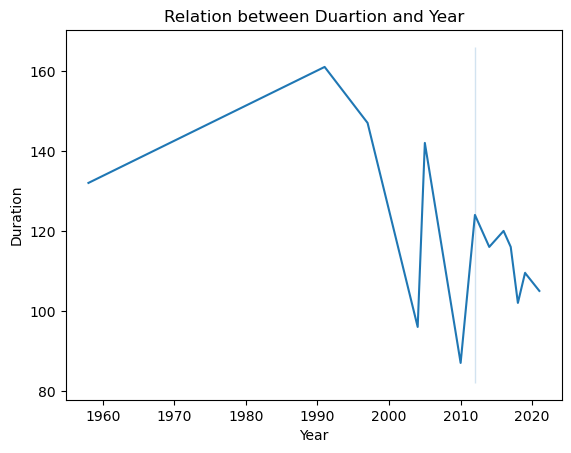

In [16]:
sns.lineplot(data=data1.head(15),x='Year',y='Duration')
plt.title('Relation between Duartion and Year')
plt.show()

# Duration of the movies was stable in early years after 1990 it started getting volatile.

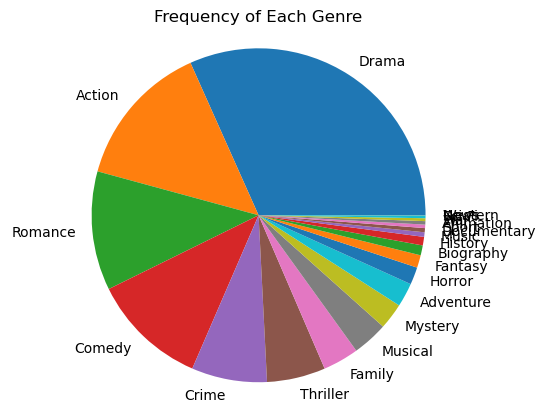

In [17]:
movies_genre = data1['Genre'].str.split(', ',expand=True).stack().value_counts()
plt.pie(movies_genre, labels=movies_genre.index)
plt.title('Frequency of Each Genre')
plt.axis('equal')
plt.show()

# Movie of Drama genre are the highest

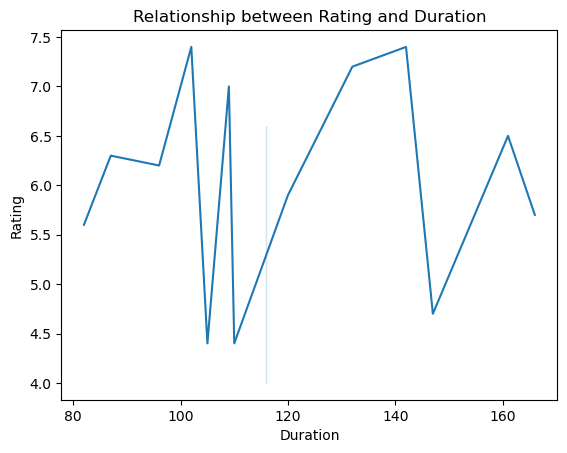

In [18]:
sns.lineplot(data=data1.head(15),x='Duration',y='Rating')
plt.title('Relationship between Rating and Duration')
plt.show()

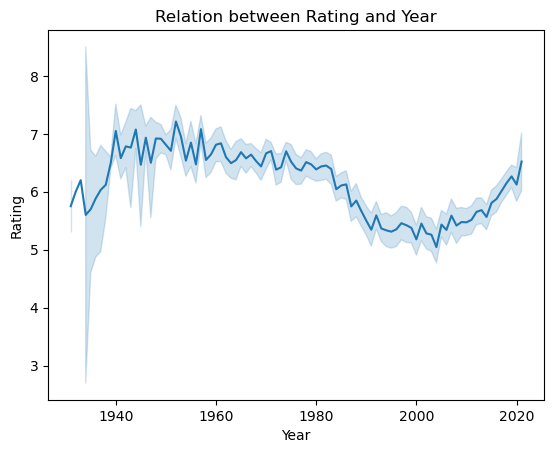

In [19]:
sns.lineplot(data=data1,x='Year',y='Rating')
plt.title('Relation between Rating and Year')
plt.show()

# Encoding Actor 1, Actor 2, Actor 3, Genre, Director to tranform the data 

In [20]:
l1 = ['Actor 1', 'Actor 2', 'Actor 3', 'Genre', 'Director']
le=LabelEncoder()
for column in l1:
    data1[column] = le.fit_transform(data1[column])
data1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi He thought he was Gandhi,2019,109,229,7.0,8,629,1352,2272,319
3,Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,229,6.1,408,1223,1861,1801,1615
15494,Zubeidaa,2001,153,133,6.2,1496,2059,763,1619,1184
15503,Zulm Ki Zanjeer,1989,125,28,5.8,44,1793,406,754,1685
15505,Zulmi,1999,129,38,4.5,655,1025,112,2164,314


# Dropping the column Name as its not required

In [21]:
data1 = data1.drop('Name',axis=1)

# Gaining statistical insights from the data

In [22]:
data1.describe()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,171.728221,5.898533,2697.649585,1211.864994,966.963598,1182.761442,1276.103375
std,19.741839,25.319939,108.208770,1.381165,13651.503584,686.698545,564.890824,666.834013,720.046925
min,1931.000000,21.000000,0.000000,1.100000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,119.000000,47.000000,5.000000,30.000000,637.000000,468.000000,617.000000,652.500000
50%,2002.000000,135.000000,184.000000,6.100000,131.000000,1198.000000,971.000000,1198.000000,1306.000000
75%,2013.000000,150.000000,248.000000,6.900000,922.500000,1793.000000,1472.000000,1767.500000,1868.500000
max,2021.000000,321.000000,375.000000,10.000000,591417.000000,2430.000000,1959.000000,2320.000000,2555.000000


# To find correlation among features in data

In [23]:
data1.corr()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Year,1.000000,-0.327567,-0.049961,-0.204642,0.129749,0.028827,-0.011155,-0.060128,-0.008812
Duration,-0.327567,1.000000,-0.183038,0.001839,0.097621,0.017059,-0.022942,0.002457,-0.013043
Genre,-0.049961,-0.183038,1.000000,0.121796,-0.068755,-0.017921,0.042745,0.028168,0.007474
Rating,-0.204642,0.001839,0.121796,1.000000,0.142563,-0.006824,0.023430,0.041353,0.042413
Votes,0.129749,0.097621,-0.068755,0.142563,1.000000,-0.009418,-0.029895,-0.030963,-0.004919
Director,0.028827,0.017059,-0.017921,-0.006824,-0.009418,1.000000,0.022918,0.018039,0.017915
Actor 1,-0.011155,-0.022942,0.042745,0.023430,-0.029895,0.022918,1.000000,-0.000642,0.013170
Actor 2,-0.060128,0.002457,0.028168,0.041353,-0.030963,0.018039,-0.000642,1.000000,0.010439
Actor 3,-0.008812,-0.013043,0.007474,0.042413,-0.004919,0.017915,0.013170,0.010439,1.000000


<AxesSubplot:>

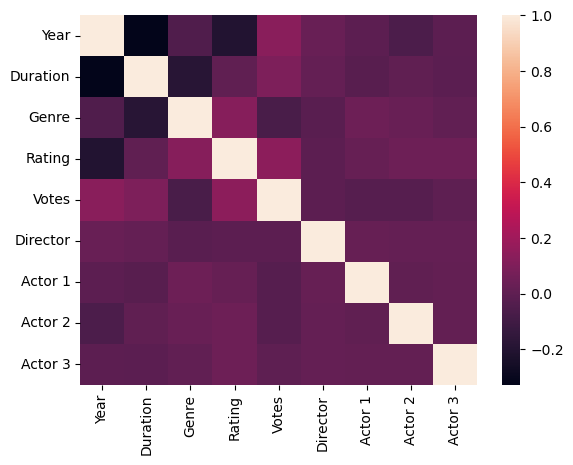

In [24]:
sns.heatmap(data1.corr())

# No specific correlaion as such in the dataset

# Splitting the dataset into training and datasets

In [25]:
x = data1.drop('Rating',axis=1)
y= data1['Rating']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)

# Building and evaluating Linear Regression Model

In [26]:

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(x_test)
y_pred

array([5.69299273, 5.93368101, 5.55361138, ..., 5.57660396, 6.91402059,
       6.09440446])

In [28]:
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {mean_squared_error(y_test,y_pred)}")

Mean Absolute Error : 1.0371774129788538
Mean Squared Error : 1.7048659303464677


In [29]:
print(f"R2 score : {r2_score(y_test,y_pred)}")

R2 score : 0.09344762137145113


# Building and evaluating Random Forest Regression Model

In [30]:
randomforest_regressor= RandomForestRegressor(n_estimators=5)
score=cross_val_score(randomforest_regressor,x,y,cv=5)

In [31]:
score.mean()

0.22992993161955969

In [32]:
mae_scores = -cross_val_score(randomforest_regressor, x, y, cv=10, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(randomforest_regressor, x, y, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(randomforest_regressor, x, y, cv=10, scoring='r2')
print("Mean Absolute Error:", mae_scores.mean())
print("Mean Squared Error:", mse_scores.mean())
print("R-squared:", r2_scores.mean())
print(f"R2 score : {r2_score(y_test,y_pred)}")

Mean Absolute Error: 0.9099093279964977
Mean Squared Error: 1.4987629695737827
R-squared: 0.2157978917610547
R2 score : 0.09344762137145113


# Building and evaluating Decision Tree Regression Model

In [33]:
DecTree_regressor= DecisionTreeRegressor(max_depth=2)
score=cross_val_score(DecTree_regressor,x,y,cv=5)

In [34]:
score.mean()

0.15287630808030522

In [35]:
mae_scores = -cross_val_score(DecTree_regressor,x, y, cv=10, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(DecTree_regressor,x, y, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(DecTree_regressor,x, y, cv=10, scoring='r2')
print("Mean Absolute Error:", mae_scores.mean())
print("Mean Squared Error:", mse_scores.mean())
print("R-squared:", r2_scores.mean())
print(f"R2 score : {r2_score(y_test,y_pred)}")

Mean Absolute Error: 0.9891880286212607
Mean Squared Error: 1.62129433693759
R-squared: 0.14992629520585626
R2 score : 0.09344762137145113


# The Random Forest Regression model seems to perform the best among the three models, as it has the lowest MAE and MSE, and the highest R2 score. Therefore, the Random Forest Regression model fits the data best.